# First Deep Learning Model

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets.samples_generator import make_circles

In [3]:
# Artificially generating a data
# It is data that cannot be linearly separated.
# factor: scale between inner and outher circles 
# X: double in <0, 1> + noise
X, y = make_circles(n_samples = 1000,
                    noise = 0.1,
                    factor = 0.15,
                    random_state=0)

In [4]:
X

array([[ 0.19284873,  0.04271216],
       [ 0.05431586, -0.00768059],
       [-0.78677748, -0.75718576],
       ..., 
       [ 0.01863581, -0.05541719],
       [ 0.16937149,  0.06393013],
       [-0.15809967,  0.05229107]])

In [5]:
# Printing the shape of the data.
# it should be equal to (n_samples, 2)
X.shape

(1000, 2)

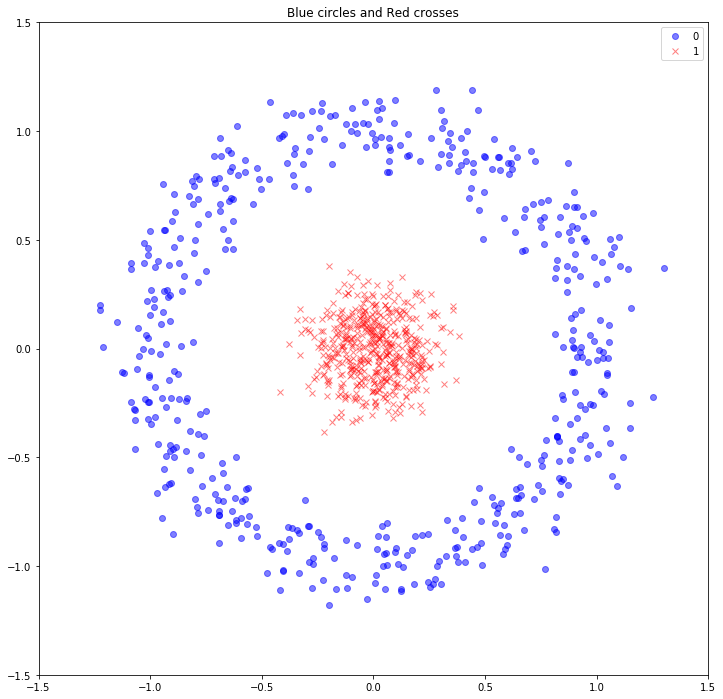

In [6]:
# Plotting a figure of a certain size
plt.figure(figsize = (12, 12))
# Plotting the outher circle as blue circles
# alpha : transparency, where 0 is fully transparent
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
# Plotting the inner data as red x's
plt.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
# Setting up the limits
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
# Adding the legend
plt.legend(['0', '1'])
# Adding the title
plt.title("Blue circles and Red crosses")

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(4, input_shape=(2,), activation = 'tanh'))

In [10]:
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(SGD(lr = 0.5), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X, y, epochs = 20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 0.6942 - acc: 0.5030     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 0.6869 - acc: 0.6250     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.6632 - acc: 0.6960     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.6040 - acc: 0.7340     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.4865 - acc: 0.8720     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.3470 - acc: 0.9920     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.2411 - acc: 0.9990     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.1714 - acc: 1.0000     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.1287 - acc: 1.0000     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.1009 - acc: 1.0000     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

In [13]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

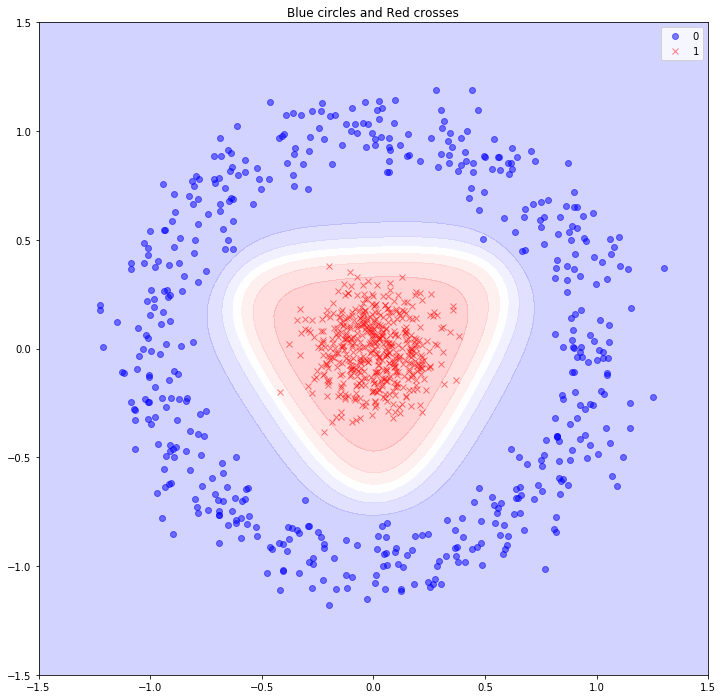

In [14]:
plt.figure(figsize = (12, 12))
plt.contourf(aa, bb, cc, cmap = 'bwr', alpha = 0.2)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")